In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [3]:
import pandas as pd

selected_features = [
    # Primary Features
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Shipping Mode',
    'Delivery Status',
    'Order Region',
    'Order State',
    'Order City',
    
    # Secondary Features
    'Category Name',
    'Order Item Quantity',
    'Order Item Product Price',
    'Order Item Discount Rate',
    'Sales per customer',
    'Latitude',
    'Longitude',
    
    # Target Variable
    'Late_delivery_risk'
]

data_selected = data[selected_features]

print(f"Selected Features Shape: {data_selected.shape}")
print(data_selected.head())


Selected Features Shape: (180519, 15)
   Days for shipping (real)  Days for shipment (scheduled)   Shipping Mode  \
0                         3                              4  Standard Class   
1                         5                              4  Standard Class   
2                         4                              4  Standard Class   
3                         3                              4  Standard Class   
4                         2                              4  Standard Class   

    Delivery Status    Order Region      Order State  Order City  \
0  Advance shipping  Southeast Asia  Java Occidental      Bekasi   
1     Late delivery      South Asia         Rajastán     Bikaner   
2  Shipping on time      South Asia         Rajastán     Bikaner   
3  Advance shipping         Oceania       Queensland  Townsville   
4  Advance shipping         Oceania       Queensland  Townsville   

    Category Name  Order Item Quantity  Order Item Product Price  \
0  Sporting Good

In [4]:
print(data_selected.columns)


Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Shipping Mode', 'Delivery Status', 'Order Region', 'Order State',
       'Order City', 'Category Name', 'Order Item Quantity',
       'Order Item Product Price', 'Order Item Discount Rate',
       'Sales per customer', 'Latitude', 'Longitude', 'Late_delivery_risk'],
      dtype='object')


Data cleaning

In [5]:
missing_values = data_selected.isnull().sum()
print(f"Missing Values:\n{missing_values[missing_values > 0]}")

numerical_features = ['Order Item Product Price', 'Latitude', 'Longitude', 'Sales per customer']
for feature in numerical_features:
    if data_selected[feature].isnull().sum() > 0:
        data_selected[feature].fillna(data_selected[feature].median(), inplace=True)

categorical_features = ['Shipping Mode', 'Order City', 'Order Region', 'Delivery Status']
for feature in categorical_features:
    if data_selected[feature].isnull().sum() > 0:
        data_selected[feature].fillna('Unknown', inplace=True)

missing_values_after = data_selected.isnull().sum()
print(f"Missing Values After Imputation:\n{missing_values_after[missing_values_after > 0]}")


Missing Values:
Series([], dtype: int64)
Missing Values After Imputation:
Series([], dtype: int64)


Checking duplicate row

In [6]:
duplicate_rows = data_selected.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

data_selected = data_selected.drop_duplicates()

duplicate_rows_after = data_selected.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after}")


Number of duplicate rows: 1
Number of duplicate rows after removal: 0


Outlier detection and handling

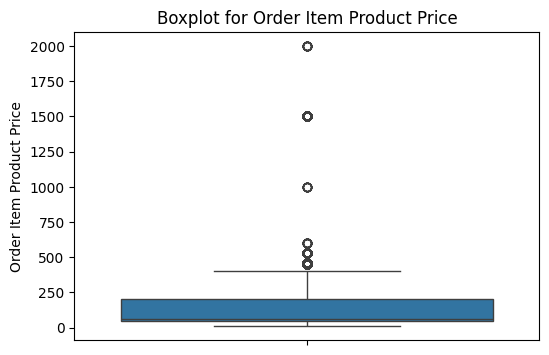

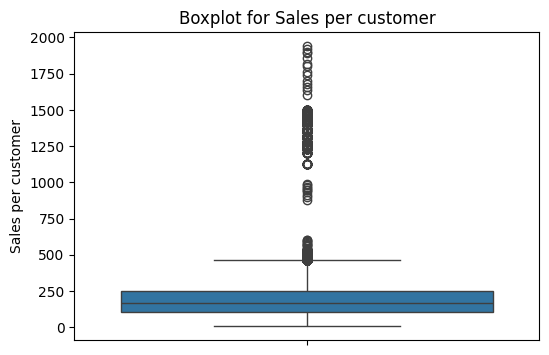

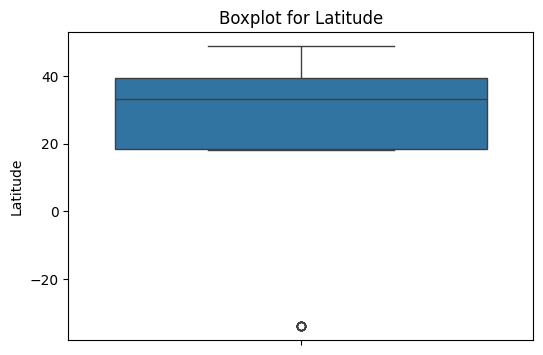

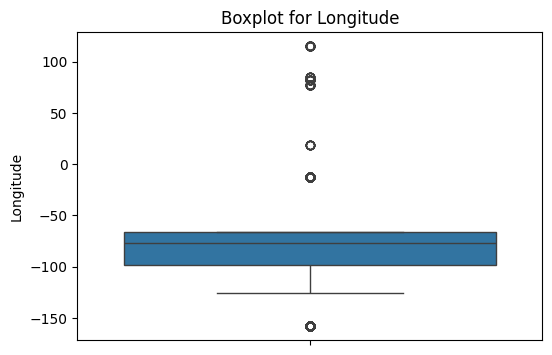

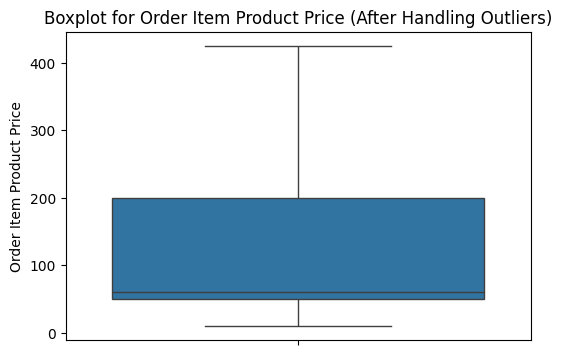

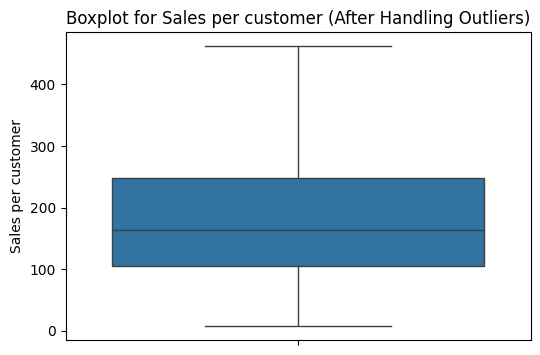

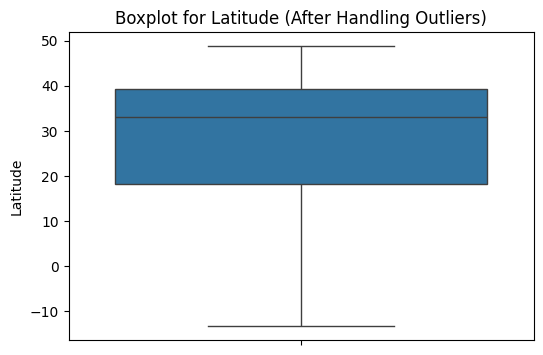

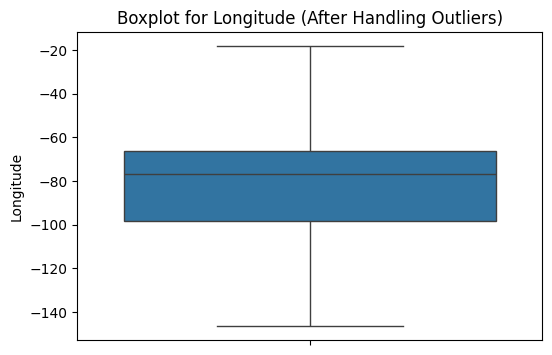

       Order Item Product Price  Sales per customer       Latitude  \
count             180518.000000       180518.000000  180518.000000   
mean                 137.940678          180.596133      29.721049   
std                  120.631874          104.383276       9.808033   
min                    9.990000            7.490000     -13.255845   
25%                   50.000000          104.379997      18.265432   
50%                   59.990002          163.990005      33.144863   
75%                  199.990005          247.399994      39.279617   
max                  424.975014          461.929989      48.781933   

           Longitude  
count  180518.000000  
mean      -84.906124  
std        20.831778  
min      -146.559906  
25%       -98.446312  
50%       -76.847908  
75%       -66.370583  
max       -18.256989  


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Order Item Product Price', 'Sales per customer', 'Latitude', 'Longitude']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data_selected[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()

def handle_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)  
    Q3 = data[feature].quantile(0.75)  
    IQR = Q3 - Q1                      
    lower_bound = Q1 - 1.5 * IQR       
    upper_bound = Q3 + 1.5 * IQR       
    

    data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
    data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])

for feature in numerical_features:
    handle_outliers(data_selected, feature)

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data_selected[feature])
    plt.title(f"Boxplot for {feature} (After Handling Outliers)")
    plt.show()

print(data_selected[numerical_features].describe())



Steps for Outlier Detection and Handling:
Detect Outliers:

Use statistical methods such as the IQR (Interquartile Range) or visualization methods like boxplots to identify outliers.
Handle Outliers:

Approaches include capping (replacing extreme values with thresholds), removing outliers, or transforming the data (e.g., log transformation).

Explanation of the Code:
Boxplots:

Visualize the distribution and identify potential outliers in numerical features.
IQR Method:

Calculate the lower and upper bounds for each feature based on the interquartile range (IQR).
Cap values below the lower bound or above the upper bound to these respective thresholds.
Verify Changes:

Plot boxplots again to ensure the outliers are handled.
Review the statistical summary (describe) for the changes in feature distributions.


In [8]:
print("Data Types Before Conversion:")
print(data_selected.dtypes)


numerical_features = ['Order Item Product Price', 'Latitude', 'Longitude', 'Sales per customer']
for feature in numerical_features:
    data_selected[feature] = pd.to_numeric(data_selected[feature], errors='coerce')

categorical_features = ['Shipping Mode', 'Order City', 'Order Region', 'Delivery Status', 'Category Name']
for feature in categorical_features:
    data_selected[feature] = data_selected[feature].astype('category')

data_selected['Late_delivery_risk'] = data_selected['Late_delivery_risk'].astype('int')

print("\nData Types After Conversion:")
print(data_selected.dtypes)


Data Types Before Conversion:
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Shipping Mode                     object
Delivery Status                   object
Order Region                      object
Order State                       object
Order City                        object
Category Name                     object
Order Item Quantity                int64
Order Item Product Price         float64
Order Item Discount Rate         float64
Sales per customer               float64
Latitude                         float64
Longitude                        float64
Late_delivery_risk                 int64
dtype: object

Data Types After Conversion:
Days for shipping (real)            int64
Days for shipment (scheduled)       int64
Shipping Mode                    category
Delivery Status                  category
Order Region                     category
Order State                        object
Order City                       category
Category Name    

In [9]:
print("Data Types Before Handling:")
print(data_selected.dtypes)

numerical_features = ['Order Item Product Price', 'Latitude', 'Longitude', 'Sales per customer']
for feature in numerical_features:
    data_selected[feature] = pd.to_numeric(data_selected[feature], errors='coerce')

categorical_features = ['Shipping Mode', 'Order City', 'Order Region', 'Delivery Status', 'Category Name']
for feature in categorical_features:
    data_selected[feature] = data_selected[feature].astype('category')


data_selected['Late_delivery_risk'] = data_selected['Late_delivery_risk'].astype('int')


if 'order date (DateOrders)' in data_selected.columns:
    data_selected['order date (DateOrders)'] = pd.to_datetime(data_selected['order date (DateOrders)'], errors='coerce')

print("\nData Types After |Handling:")
print(data_selected.dtypes)


Data Types Before Handling:
Days for shipping (real)            int64
Days for shipment (scheduled)       int64
Shipping Mode                    category
Delivery Status                  category
Order Region                     category
Order State                        object
Order City                       category
Category Name                    category
Order Item Quantity                 int64
Order Item Product Price          float64
Order Item Discount Rate          float64
Sales per customer                float64
Latitude                          float64
Longitude                         float64
Late_delivery_risk                  int32
dtype: object

Data Types After |Handling:
Days for shipping (real)            int64
Days for shipment (scheduled)       int64
Shipping Mode                    category
Delivery Status                  category
Order Region                     category
Order State                        object
Order City                       category
Categ

Normalization standarization

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_features = ['Order Item Product Price', 'Latitude', 'Longitude', 'Sales per customer']

scaler_normal = MinMaxScaler()
data_selected[numerical_features] = scaler_normal.fit_transform(data_selected[numerical_features])


print("\nScaled Numerical Features:")
print(data_selected[numerical_features].head())



Scaled Numerical Features:
   Order Item Product Price  Latitude  Longitude  Sales per customer
0                  0.765714  0.507873   0.627600            0.675887
1                  0.765714  0.508324   0.627599            0.668669
2                  0.765714  0.814795   0.192347            0.665060
3                  0.765714  0.763757   0.220329            0.654256
4                  0.765714  0.507910   0.627600            0.639820


Feature selection

Steps:
Create interaction terms (e.g., Order Item Quantity × Order Item Product Price for revenue).
Bin numerical data into categories (e.g., categorize Days for shipping (real) into "Short", "Medium", "Long").
Extract insights from categorical data (e.g., encode Shipping Mode using one-hot encoding).
Combine latitude/longitude into a single feature for distance-based analysis.
Create time-based features (e.g., extract the day of the week or month from order date (DateOrders)).

In [11]:
data_selected['Total Revenue'] = data_selected['Order Item Quantity'] * data_selected['Order Item Product Price']

def bin_shipping_days(days):
    if days <= 2:
        return 'Short'
    elif days <= 5:
        return 'Medium'
    else:
        return 'Long'

data_selected['Shipping Duration'] = data_selected['Days for shipping (real)'].apply(bin_shipping_days)

data_selected = pd.get_dummies(data_selected, columns=['Shipping Mode', 'Delivery Status', 'Order Region'], drop_first=True)


data_selected['Distance'] = (data_selected['Latitude']**2 + data_selected['Longitude']**2)**0.5

if 'order date (DateOrders)' in data_selected.columns:
    data_selected['Order Month'] = data_selected['order date (DateOrders)'].dt.month
    data_selected['Order Day'] = data_selected['order date (DateOrders)'].dt.day
    data_selected['Order Weekday'] = data_selected['order date (DateOrders)'].dt.weekday

print("\nFeature Engineered Dataset:")
print(data_selected.head())



Feature Engineered Dataset:
   Days for shipping (real)  Days for shipment (scheduled)      Order State  \
0                         3                              4  Java Occidental   
1                         5                              4         Rajastán   
2                         4                              4         Rajastán   
3                         3                              4       Queensland   
4                         2                              4       Queensland   

   Order City   Category Name  Order Item Quantity  Order Item Product Price  \
0      Bekasi  Sporting Goods                    1                  0.765714   
1     Bikaner  Sporting Goods                    1                  0.765714   
2     Bikaner  Sporting Goods                    1                  0.765714   
3  Townsville  Sporting Goods                    1                  0.765714   
4  Townsville  Sporting Goods                    1                  0.765714   

   Order Item D

Train test split

In [12]:
data_selected

,Days for shipping (real),Days for shipment (scheduled),Order State,Order City,Category Name,Order Item Quantity,Order Item Product Price,Order Item Discount Rate,Sales per customer,Latitude,...,Order Region_South of USA,Order Region_Southeast Asia,Order Region_Southern Africa,Order Region_Southern Europe,Order Region_US Center,Order Region_West Africa,Order Region_West Asia,Order Region_West of USA,Order Region_Western Europe,Distance
0,3,4,Java Occidental,Bekasi,Sporting Goods,1,0.765714,0.04,0.675887,0.507873,...,False,True,False,False,False,False,False,False,False,0.807351
1,5,4,Rajastán,Bikaner,Sporting Goods,1,0.765714,0.05,0.668669,0.508324,...,False,False,False,False,False,False,False,False,False,0.807635
2,4,4,Rajastán,Bikaner,Sporting Goods,1,0.765714,0.06,0.665060,0.814795,...,False,False,False,False,False,False,False,False,False,0.837191
3,3,4,Queensland,Townsville,Sporting Goods,1,0.765714,0.07,0.654256,0.763757,...,False,False,False,False,False,False,False,False,False,0.794902
4,2,4,Queensland,Townsville,Sporting Goods,1,0.765714,0.09,0.639820,0.507910,...,False,False,False,False,False,False,False,False,False,0.807375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,Shanghái,Shanghái,Fishing,1,0.939769,0.00,0.863678,0.868773,...,False,False,False,False,False,False,False,False,False,1.036872
180515,3,2,Osaka,Hirakata,Fishing,1,0.939769,0.01,0.854876,0.783690,...,False,False,False,False,False,False,False,False,False,0.812556
180516,5,4,Australia del Sur,Adelaide,Fishing,1,0.939769,0.02,0.846074,0.884716,...,False,False,False,False,False,False,False,False,False,1.054383
180517,3,4,Australia del Sur,Adelaide,Fishing,1,0.939769,0.03,0.837272,0.507259,...,False,False,False,False,False,False,False,False,False,0.804945


In [13]:
print(data_selected.columns)


Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Order State', 'Order City', 'Category Name', 'Order Item Quantity',
       'Order Item Product Price', 'Order Item Discount Rate',
       'Sales per customer', 'Latitude', 'Longitude', 'Late_delivery_risk',
       'Total Revenue', 'Shipping Duration', 'Shipping Mode_Same Day',
       'Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
       'Delivery Status_Late delivery', 'Delivery Status_Shipping canceled',
       'Delivery Status_Shipping on time', 'Order Region_Caribbean',
       'Order Region_Central Africa', 'Order Region_Central America',
       'Order Region_Central Asia', 'Order Region_East Africa',
       'Order Region_East of USA', 'Order Region_Eastern Asia',
       'Order Region_Eastern Europe', 'Order Region_North Africa',
       'Order Region_Northern Europe', 'Order Region_Oceania',
       'Order Region_South America', 'Order Region_South Asia',
       'Order Region_South of  USA ', '

In [14]:
from sklearn.model_selection import train_test_split

X = data_selected.drop(columns=['Late_delivery_risk'])
y = data_selected['Late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set Shape (X_train): {X_train.shape}, (y_train): {y_train.shape}")
print(f"Testing Set Shape (X_test): {X_test.shape}, (y_test): {y_test.shape}")


Training Set Shape (X_train): (144414, 42), (y_train): (144414,)
Testing Set Shape (X_test): (36104, 42), (y_test): (36104,)


In [15]:
print(X_train.dtypes)


Days for shipping (real)                int64
Days for shipment (scheduled)           int64
Order State                            object
Order City                           category
Category Name                        category
Order Item Quantity                     int64
Order Item Product Price              float64
Order Item Discount Rate              float64
Sales per customer                    float64
Latitude                              float64
Longitude                             float64
Total Revenue                         float64
Shipping Duration                      object
Shipping Mode_Same Day                   bool
Shipping Mode_Second Class               bool
Shipping Mode_Standard Class             bool
Delivery Status_Late delivery            bool
Delivery Status_Shipping canceled        bool
Delivery Status_Shipping on time         bool
Order Region_Caribbean                   bool
Order Region_Central Africa              bool
Order Region_Central America      

In [16]:
X_train.head()

,Days for shipping (real),Days for shipment (scheduled),Order State,Order City,Category Name,Order Item Quantity,Order Item Product Price,Order Item Discount Rate,Sales per customer,Latitude,...,Order Region_South of USA,Order Region_Southeast Asia,Order Region_Southern Africa,Order Region_Southern Europe,Order Region_US Center,Order Region_West Africa,Order Region_West Asia,Order Region_West of USA,Order Region_Western Europe,Distance
88628,3,4,Yakarta,Yakarta,Men's Footwear,1,0.289167,0.16,0.223792,0.844298,...,False,True,False,False,False,False,False,False,False,1.005125
58447,2,1,El Cairo,Cairo,Men's Footwear,1,0.289167,0.05,0.255259,0.508079,...,False,False,False,False,False,False,False,False,False,0.805462
249,6,4,Capital Nacional,Manila,Men's Footwear,1,0.289167,0.06,0.253829,0.906262,...,False,True,False,False,False,False,False,False,False,1.049144
50998,6,2,Zúrich,Zurich,Golf Shoes,5,0.132559,0.03,0.677229,0.898951,...,False,False,False,False,False,False,False,False,True,1.026331
233,5,4,Victoria,Mildura,Men's Footwear,1,0.289167,0.05,0.255259,0.779965,...,False,False,False,False,False,False,False,False,False,0.840007


In [17]:
categorical_features = X_train.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_features)


Categorical Features: Index(['Order State', 'Shipping Duration'], dtype='object')


In [18]:
for col in X.columns:
    print(f"Column: {col} - Unique values: {X[col].unique()[:10]}")  # Show only the first 10 unique values for brevity


Column: Days for shipping (real) - Unique values: [3 5 4 2 6 0 1]
Column: Days for shipment (scheduled) - Unique values: [4 1 2 0]
Column: Order State - Unique values: ['Java Occidental' 'Rajastán' 'Queensland' 'Guangdong' 'Tokio'
 'Célebes Septentrional' 'Maharashtra' 'Seúl' 'Madhya Pradesh' 'Victoria']
Column: Order City - Unique values: ['Bekasi', 'Bikaner', 'Townsville', 'Toowoomba', 'Guangzhou', 'Tokio', 'Manado', 'Sangli', 'Seúl', 'Jabalpur']
Categories (3597, object): ['Aachen', 'Aalen', 'Aalst', 'Aba', ..., 'eMbalenhle', 'Águas Lindas de Goiás', 'Çanakkale', 'Ústí nad Labem']
Column: Category Name - Unique values: ['Sporting Goods', 'Cleats', 'Shop By Sport', 'Women's Apparel', 'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In', 'Kids' Golf Clubs', 'Hunting & Shooting']
Categories (50, object): ['Accessories', 'As Seen on  TV!', 'Baby ', 'Baseball & Softball', ..., 'Water Sports', 'Women's Apparel', 'Women's Clothing', 'Women's Golf Clubs']
Column: Order Item Quantit

In [19]:
X = X.drop(columns=['Order City'])  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set Shape (X_train): {X_train.shape}, (y_train): {y_train.shape}")
print(f"Testing Set Shape (X_test): {X_test.shape}, (y_test): {y_test.shape}")


Training Set Shape (X_train): (144414, 41), (y_train): (144414,)
Testing Set Shape (X_test): (36104, 41), (y_test): (36104,)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer

X = data_selected.drop('Late_delivery_risk', axis=1)
y = data_selected['Late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

column_transformer = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)  
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(f"Accuracy of Logistic Regression: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy of Logistic Regression: 0.975902947041879
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     16293
           1       0.96      1.00      0.98     19811

    accuracy                           0.98     36104
   macro avg       0.98      0.97      0.98     36104
weighted avg       0.98      0.98      0.98     36104



In [21]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
boolean_features = X_train.select_dtypes(include=['bool']).columns

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Boolean Features:", boolean_features)


Numerical Features: Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Order Item Quantity', 'Order Item Product Price',
       'Order Item Discount Rate', 'Sales per customer', 'Latitude',
       'Longitude', 'Total Revenue', 'Distance'],
      dtype='object')
Categorical Features: Index(['Order State', 'Shipping Duration'], dtype='object')
Boolean Features: Index(['Shipping Mode_Same Day', 'Shipping Mode_Second Class',
       'Shipping Mode_Standard Class', 'Delivery Status_Late delivery',
       'Delivery Status_Shipping canceled', 'Delivery Status_Shipping on time',
       'Order Region_Caribbean', 'Order Region_Central Africa',
       'Order Region_Central America', 'Order Region_Central Asia',
       'Order Region_East Africa', 'Order Region_East of USA',
       'Order Region_Eastern Asia', 'Order Region_Eastern Europe',
       'Order Region_North Africa', 'Order Region_Northern Europe',
       'Order Region_Oceania', 'Order Region_South America',
       

Random forest classifier

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer

X = data_selected.drop('Late_delivery_risk', axis=1)
y = data_selected['Late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)  
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, max_depth=10, n_estimators=100, min_samples_split=10))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Model: {accuracy:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy of Random Forest Model: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     16293
           1       0.96      1.00      0.98     19811

    accuracy                           0.98     36104
   macro avg       0.98      0.97      0.98     36104
weighted avg       0.98      0.98      0.98     36104



In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False))
])

pipeline.fit(X_train, y_train)

y_pred_xgb = pipeline.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Model: {xgb_accuracy:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb)}")


c:\Users\KUNAL SHEDGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:04:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of XGBoost Model: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     16293
           1       0.96      1.00      0.98     19811

    accuracy                           0.98     36104
   macro avg       0.98      0.97      0.98     36104
weighted avg       0.98      0.98      0.98     36104



In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  
])

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

print("Naïve Bayes Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_nb)}")

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

print("\nK-Nearest Neighbors Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


Naïve Bayes Model
Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.91      0.63     16293
           1       0.71      0.19      0.29     19811

    accuracy                           0.51     36104
   macro avg       0.59      0.55      0.46     36104
weighted avg       0.61      0.51      0.44     36104


K-Nearest Neighbors Model
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     16293
           1       0.91      0.94      0.92     19811

    accuracy                           0.91     36104
   macro avg       0.91      0.91      0.91     36104
weighted avg       0.91      0.91      0.91     36104

